In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import axes
from PIL import Image
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse
from skimage import color
from skimage import morphology

/home/grmc1999/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


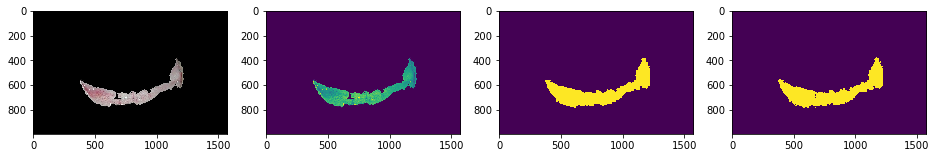

In [2]:
di='/home/grmc1999/Documentos/LIIARPI/hmg/TempDBR/Processed/Processed/eye_c1anemia-107.jpg'
img = io.imread(di)
lum = color.rgb2gray(img)
mask = morphology.remove_small_holes(morphology.remove_small_objects(lum > 0, 500),500)
mask1 = morphology.opening(mask, morphology.disk(3))
mask1=lum>0
fig, (ax0,ax1,ax2,ax3) = plt.subplots(ncols=4,figsize=(16,4))
ax0.imshow(img)
ax1.imshow(lum)
ax2.imshow(mask)
ax3.imshow(mask1)

<ipython-input-3-320e0e9e1188>:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = slic(img, n_segments = 500, sigma = 5)


(-0.5, 1573.5, 995.5, -0.5)

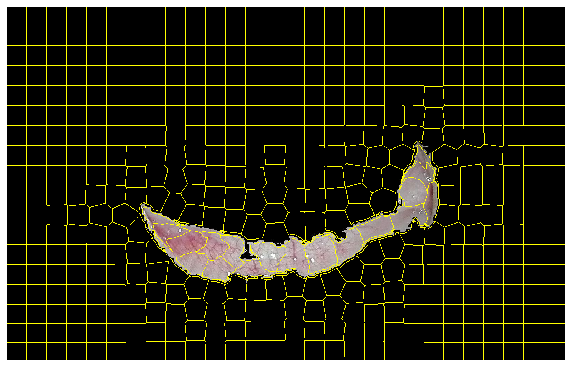

In [3]:
segments = slic(img, n_segments = 500, sigma = 5)
fig = plt.figure("Superpixels -- %d segments" % (500),figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(img, segments))
plt.axis("off")

(-0.5, 1573.5, 995.5, -0.5)

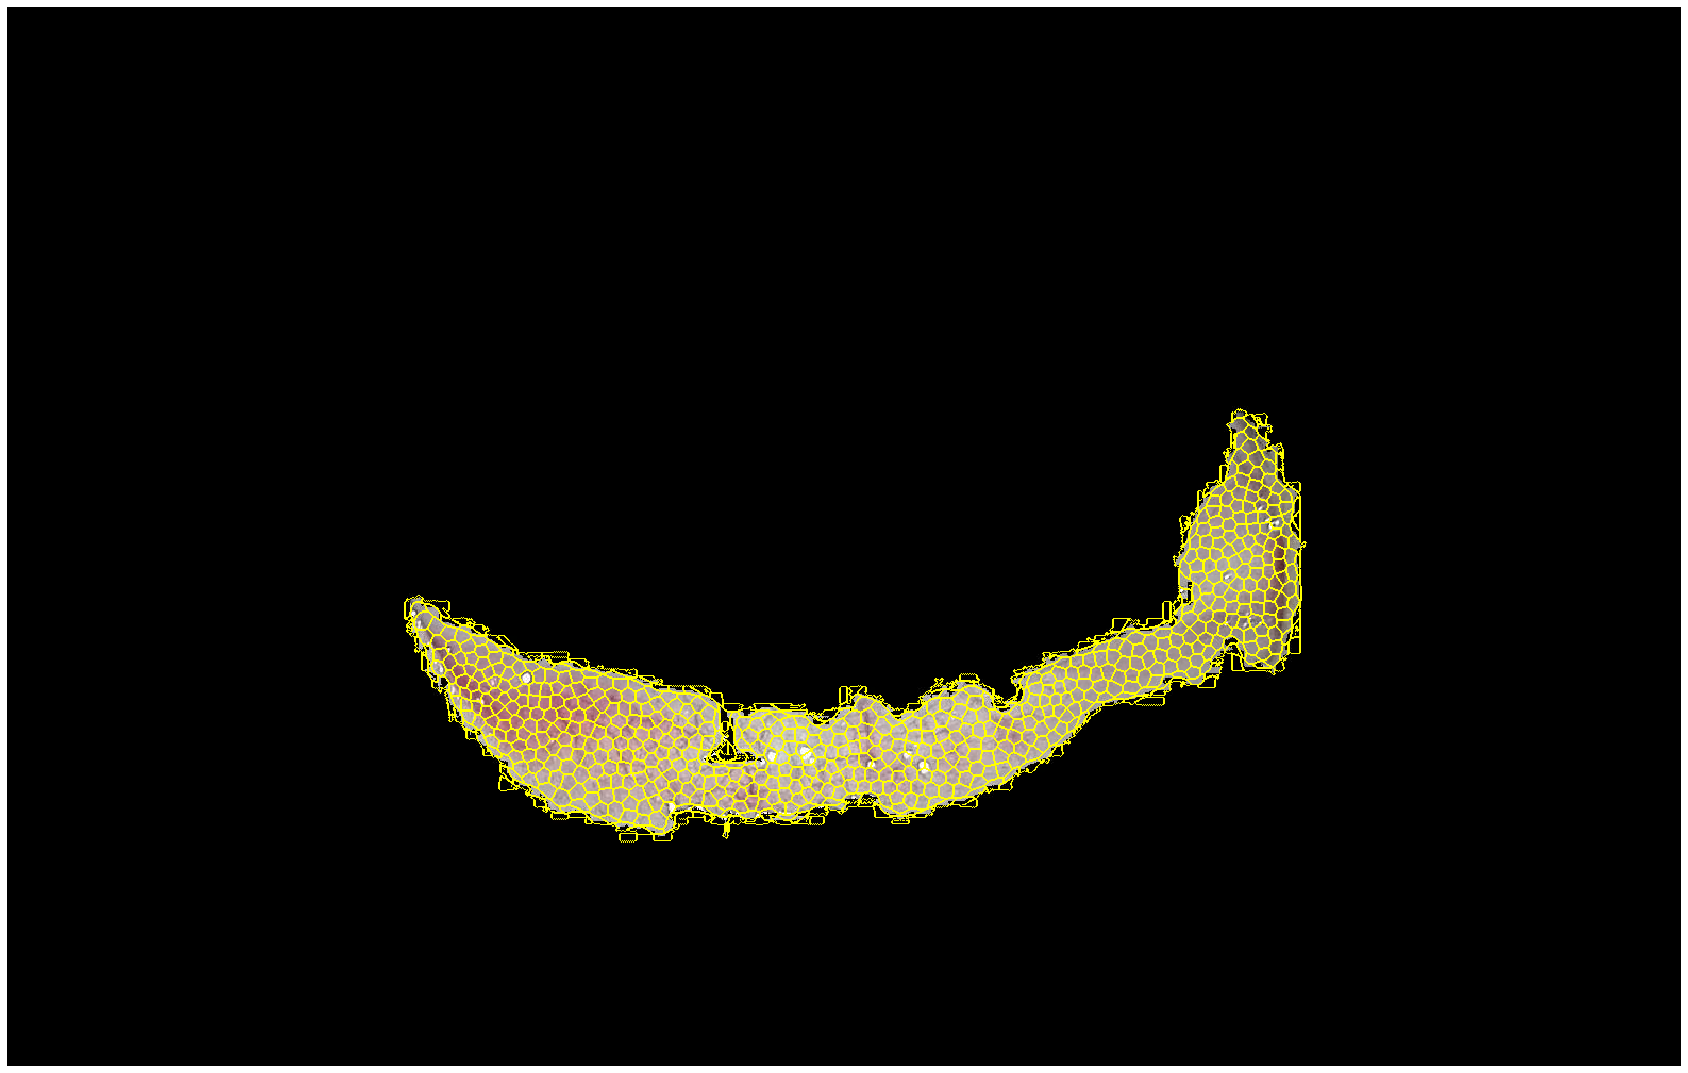

In [4]:
m_slic = slic(img, n_segments=800,sigma=5,mask=mask1)

fig = plt.figure("Superpixels -- %d segments" % (500),figsize=(30,30))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(img, m_slic))
plt.axis("off")

In [5]:
RID=set(m_slic.flatten())
f=np.zeros((img.shape[0],img.shape[1],4))
f[:,:,0:3]=img[:,:,0:3]
f[:,:,3]=m_slic

DIRID={i:{'N':0,'RGB':np.zeros((3))} for i in RID}
for i in f:
    for j in i:
        DIRID[j[3]]['RGB']+=j[0:3]
        DIRID[j[3]]['N']+=1
for i in DIRID:
    DIRID[i]['RGB']//=DIRID[i]['N']


In [6]:
RID=set(m_slic.flatten())
f=np.zeros((img.shape[0],img.shape[1],4))
f[:,:,0:3]=img[:,:,0:3]
f[:,:,3]=m_slic

DIRID={i:{'U':np.zeros((3)),'X':np.zeros((3))} for i in RID}
indx=np.where(f[:,:,3]==1)
f[indx[0],indx[1],:]

for i in RID:
    indx=np.where(f[:,:,3]==i)
    x=np.mean(f[indx[0],indx[1],:],axis=0)
    u=np.std(f[indx[0],indx[1],:],axis=0)
    DIRID[i]['X']=x[0:3]
    DIRID[i]['U']=u[0:3]

In [7]:
DIRID

{0: {'U': array([0.24761871, 0.24730658, 0.24650097]),
  'X': array([0.00571959, 0.00563779, 0.00549193])},
 1: {'U': array([45.88025306, 44.27448724, 42.74062477]),
  'X': array([47.04878049, 45.19512195, 44.08536585])},
 2: {'U': array([3.4337138 , 3.27949948, 2.74164562]),
  'X': array([1.54216867, 1.46987952, 2.60240964])},
 3: {'U': array([47.24196026, 46.1400124 , 44.90929265]),
  'X': array([46.47572816, 43.66990291, 41.00970874])},
 4: {'U': array([53.56613402, 50.70022962, 50.78724341]),
  'X': array([91.37327189, 85.77880184, 83.79262673])},
 5: {'U': array([48.68091087, 48.5458555 , 48.12914808]),
  'X': array([26.38983051, 24.83050847, 24.56779661])},
 6: {'U': array([19.98140512, 19.24264575, 19.00939452]),
  'X': array([92.65873016, 85.92063492, 82.43650794])},
 7: {'U': array([23.71467882, 22.54267809, 22.89338644]),
  'X': array([129.34920635, 120.95238095, 119.16666667])},
 8: {'U': array([40.15324724, 39.02539682, 38.41888913]),
  'X': array([103.84166667,  98.5416666

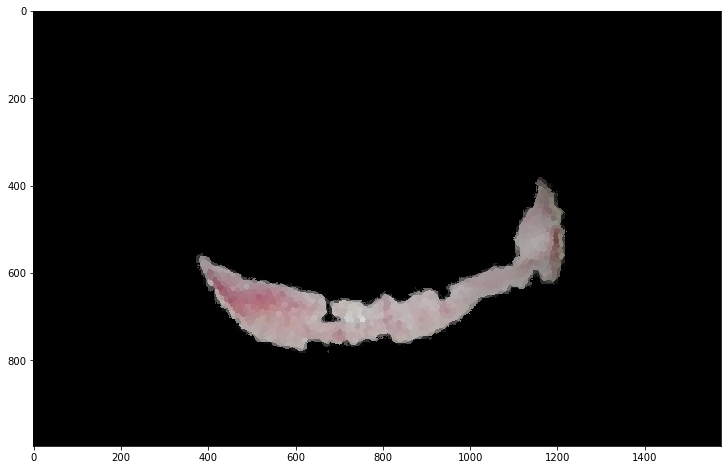

In [24]:
ff=f.copy()
for i in ff:
    for j in i:
        j[0:3]=DIRID[j[3]]['RGB']
t=np.zeros((img.shape[0],img.shape[1],3))
t=ff[:,:,0:3]
ff=t
img2s=Image.fromarray(ff.astype(np.uint8))
img2s
fig, (ax0) = plt.subplots(ncols=1,figsize=(32,8))
ax0.imshow(img2s)

In [46]:
di='/home/grmc1999/Documentos/LIIARPI/hmg/TempDBR/Processed/Processed/eye_c1anemia-107.jpg'
img = io.imread(di)

def get_Statistical_Descriptors(img,n_segments=800):
    lum = color.rgb2gray(img)
    mask1=lum>0

    m_slic = slic(img, n_segments=n_segments,sigma=5,mask=mask1)

    RID=set(m_slic.flatten())
    f=np.zeros((img.shape[0],img.shape[1],4))
    f[:,:,0:3]=img[:,:,0:3]
    f[:,:,3]=m_slic

    DIRID={i:{'U':np.zeros((3)),'X':np.zeros((3)),
              'Per':np.zeros((3)),'Mo':np.zeros((3))} for i in RID}
    indx=np.where(f[:,:,3]==1)
    f[indx[0],indx[1],:]

    for i in RID:
        indx=np.where(f[:,:,3]==i)
        x=np.mean(f[indx[0],indx[1],:],axis=0)
        u=np.std(f[indx[0],indx[1],:],axis=0)
        perc=np.percentile(f[indx[0],indx[1],:],np.array([0,25,50,75,100]),axis=0)
        hist=np.histogram(f[indx[0],indx[1],:],bins=50,range=(0,255))
        Mo=hist[1][np.where(hist[0]==np.max(hist[0]))]
        DIRID[i]['X']=x
        DIRID[i]['U']=u
        DIRID[i]['Per']=perc
        DIRID[i]['Mo']=Mo
    return DIRID

get_X_U(img)

{0: {'U': array([0.24761871, 0.24730658, 0.24650097, 0.        ]),
  'X': array([0.00571959, 0.00563779, 0.00549193, 0.        ]),
  'Per': array([[ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [29., 29., 29.,  0.]]),
  'Mo': array([0.])},
 1: {'U': array([45.88025306, 44.27448724, 42.74062477,  0.        ]),
  'X': array([47.04878049, 45.19512195, 44.08536585,  1.        ]),
  'Per': array([[  0.  ,   0.  ,   0.  ,   1.  ],
         [  3.25,   3.  ,   3.  ,   1.  ],
         [ 21.5 ,  20.5 ,  22.  ,   1.  ],
         [ 91.  ,  87.  ,  85.75,   1.  ],
         [124.  , 117.  , 116.  ,   1.  ]]),
  'Mo': array([0.])},
 2: {'U': array([3.4337138 , 3.27949948, 2.74164562, 0.        ]),
  'X': array([1.54216867, 1.46987952, 2.60240964, 2.        ]),
  'Per': array([[ 0.,  0.,  0.,  2.],
         [ 0.,  0.,  2.,  2.],
         [ 0.,  0.,  2.,  2.],
         [ 1.,  1.,  2.,  2.],
         [19., 19., 19.,  2.]]),
  '

In [15]:
lum = color.rgb2gray(img)
mask1=lum>0

m_slic = slic(img, n_segments=100,sigma=5,mask=mask1)
RID=set(m_slic.flatten())

f=np.zeros((img.shape[0],img.shape[1],4))
f[:,:,0:3]=img[:,:,0:3]
f[:,:,3]=m_slic

DIRID={i:{'U':np.zeros((3)),'X':np.zeros((3))} for i in RID}
indx=np.where(f[:,:,3]==1)
f[indx[0],indx[1],:]

i=0
indx=np.where(f[:,:,3]==i)
x=np.mean(f[indx[0],indx[1],:],axis=0)
u=np.std(f[indx[0],indx[1],:],axis=0)
DIRID[i]['X']=x
DIRID[i]['U']=u
DIRID

{0: {'U': array([0.24616728, 0.2466768 , 0.24545554, 0.        ]),
  'X': array([0.00554991, 0.00570462, 0.0053877 , 0.        ])},
 1: {'U': array([0., 0., 0.]), 'X': array([0., 0., 0.])},
 2: {'U': array([0., 0., 0.]), 'X': array([0., 0., 0.])},
 3: {'U': array([0., 0., 0.]), 'X': array([0., 0., 0.])},
 4: {'U': array([0., 0., 0.]), 'X': array([0., 0., 0.])},
 5: {'U': array([0., 0., 0.]), 'X': array([0., 0., 0.])},
 6: {'U': array([0., 0., 0.]), 'X': array([0., 0., 0.])},
 7: {'U': array([0., 0., 0.]), 'X': array([0., 0., 0.])},
 8: {'U': array([0., 0., 0.]), 'X': array([0., 0., 0.])},
 9: {'U': array([0., 0., 0.]), 'X': array([0., 0., 0.])},
 10: {'U': array([0., 0., 0.]), 'X': array([0., 0., 0.])},
 11: {'U': array([0., 0., 0.]), 'X': array([0., 0., 0.])},
 12: {'U': array([0., 0., 0.]), 'X': array([0., 0., 0.])},
 13: {'U': array([0., 0., 0.]), 'X': array([0., 0., 0.])},
 14: {'U': array([0., 0., 0.]), 'X': array([0., 0., 0.])},
 15: {'U': array([0., 0., 0.]), 'X': array([0., 0.,

In [45]:
i=0
indx=np.where(f[:,:,3]==0)
x=np.mean(f[indx[0],indx[1],:],axis=0)
u=np.std(f[indx[0],indx[1],:],axis=0)
perc=np.percentile(f[indx[0],indx[1],:],np.array([0,25,50,75,100]),axis=0)
hist=np.histogram(f[indx[0],indx[1],:],bins=50,range=(0,255))
Mo=hist[1][np.where(hist[0]==np.max(hist[0]))]
DIRID[i]['X']=x
DIRID[i]['U']=u
DIRID

{0: {'U': array([0.24616728, 0.2466768 , 0.24545554, 0.        ]),
  'X': array([0.00554991, 0.00570462, 0.0053877 , 0.        ])},
 1: {'U': array([0., 0., 0.]), 'X': array([0., 0., 0.])},
 2: {'U': array([0., 0., 0.]), 'X': array([0., 0., 0.])},
 3: {'U': array([0., 0., 0.]), 'X': array([0., 0., 0.])},
 4: {'U': array([0., 0., 0.]), 'X': array([0., 0., 0.])},
 5: {'U': array([0., 0., 0.]), 'X': array([0., 0., 0.])},
 6: {'U': array([0., 0., 0.]), 'X': array([0., 0., 0.])},
 7: {'U': array([0., 0., 0.]), 'X': array([0., 0., 0.])},
 8: {'U': array([0., 0., 0.]), 'X': array([0., 0., 0.])},
 9: {'U': array([0., 0., 0.]), 'X': array([0., 0., 0.])},
 10: {'U': array([0., 0., 0.]), 'X': array([0., 0., 0.])},
 11: {'U': array([0., 0., 0.]), 'X': array([0., 0., 0.])},
 12: {'U': array([0., 0., 0.]), 'X': array([0., 0., 0.])},
 13: {'U': array([0., 0., 0.]), 'X': array([0., 0., 0.])},
 14: {'U': array([0., 0., 0.]), 'X': array([0., 0., 0.])},
 15: {'U': array([0., 0., 0.]), 'X': array([0., 0.,

In [43]:
dat=f[indx[0],indx[1],:]
u=np.histogram(dat,bins=50,range=(0,255))
Mo=u[1][np.where(u[0]==np.max(u[0]))]

array([0.])